- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

#### Họ và tên: Nguyễn Thị Hồng Thi

## Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

PATH = "heart.csv" # Path to your file


In [14]:
def read_dataset(PATH):
    df = pd.read_csv(PATH)
    display(df.head())
    display(df.tail())
    
    return df

In [15]:
df = read_dataset(PATH)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
885,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


Dataset không có missing value 

In [127]:
# Kiểm tra xem có dữ liệu trùng không nếu có thì loại bỏ chỉ giữ lại 1 giá trị, nếu không thì không cần xử lý
df.duplicated().any()

False

In [10]:
print("Quantitative columns:\n")
print(df.describe())
print()
print("Qualitative and Quantitative columns:\n")
print(df.describe(include=[object, float]))

Quantitative columns:

              age         sex          cp    trestbps        chol         fbs  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    54.007901    0.683973    1.005643  132.117381  247.497743    0.168172   
std      9.126292    0.465186    1.024542   16.807511   47.209995    0.374230   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  212.000000    0.000000   
50%     54.000000    1.000000    1.000000  130.000000  245.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.495485  149.492099    0.310384    1.083296    1.424379    0.714447   
std 

## Preprocessing

In [12]:
print('Continous columns:\n')
continous_columns = df.describe().columns
print(continous_columns)


Continous columns:

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Các cột features trong dataset đều là continous và không có categorical

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

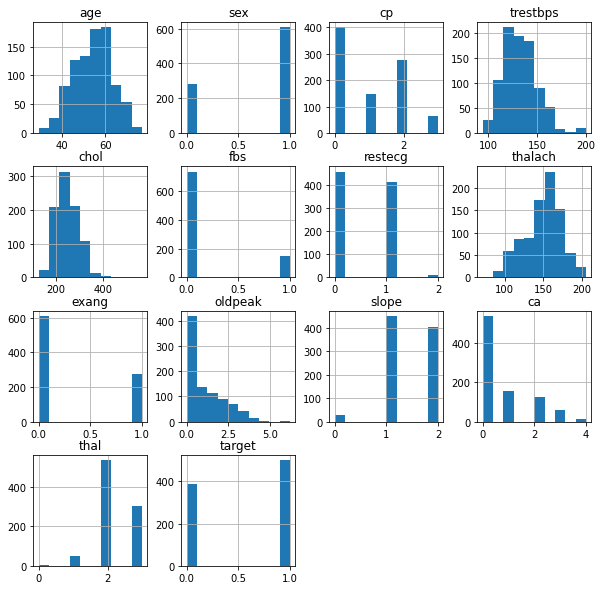

In [16]:
df.hist(column = continous_columns, figsize = (10, 10))

#### Checking and remove Outlier

d:\Anaconda\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Before remove outliers')

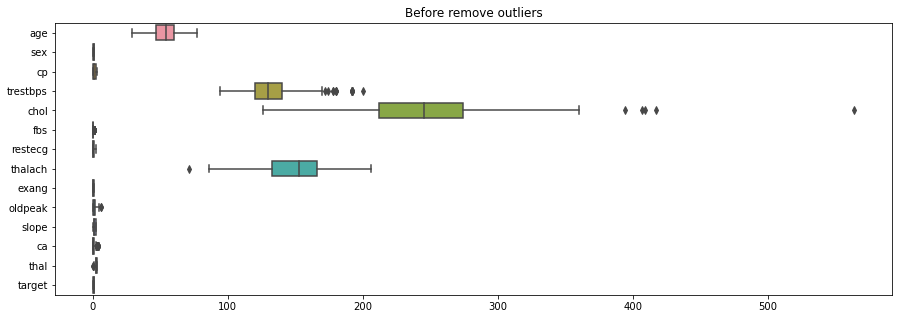

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')
plt.title('Before remove outliers')

Vì dữ liệu có các điểm outlier ở các features: trestbps, chol, thalach; nên tiến hành loại bỏ các outlier đó để kết quả dự đoán chính xác hơn

In [18]:
# Loại bỏ Outlier ở feature "trestbps"
q1 = df.trestbps.quantile(0.25)
q3 = df.trestbps.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
df[df["trestbps"] > upper_limit]
df=df[df["trestbps"] < upper_limit]


In [19]:
# Loại bỏ Outlier ở feature "chol"
q1 = df.chol.quantile(0.25)
q3 = df.chol.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
k1=df[df["chol"]>upper_limit]
df=df[df["chol"]<upper_limit]


In [20]:
# Loại bỏ Outlier ở feature "thalach"
q1 = df.thalach.quantile(0.25)
q3 = df.thalach.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
df[df["thalach"] < lower_limit]
df=df[df["thalach"] > lower_limit]

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,53.860303,0.686845,1.006985,130.857974,245.729919,0.166473,0.502910,149.100116,0.309662,1.079860,1.427241,0.712456,2.265425,0.573923
std,9.187330,0.464047,1.025297,14.908449,44.900088,0.372721,0.525285,23.631726,0.462624,1.137526,0.552809,1.034361,0.568689,0.494793
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,244.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,271.500000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,360.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


d:\Anaconda\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'After removed outliers')

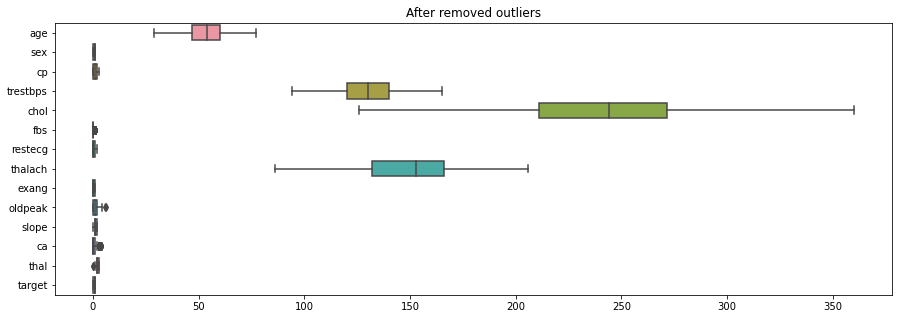

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')
plt.title('After removed outliers')

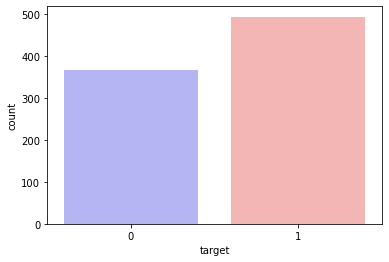

In [23]:
sns.countplot(x="target", data=df, palette="bwr") # Thống kê cột 'target'
plt.show()

Cột target có tỷ lệ 0 và 1 tương đối đồng đều nên dữ liệu không bị mất cân bằng và không cần phải xử lý.

## Feature Engineering

<AxesSubplot:>

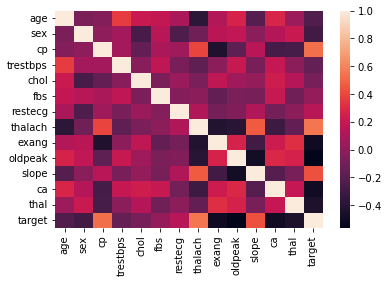

In [24]:
# Heatmap

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
  
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [25]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    columns = df.columns.tolist()     # Columns name
    columns.remove('target')           # Remove y label (column charges in this case)
    
    X = df[columns]        # X 
    y = df.target          # y
    return X, y

X, y = prepare_X_y(df)


# Apply machine learning model

## Train-test split

In [26]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 101
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [29]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', solver='liblinear'))
    # Todo: fit your model with X, y
    model.fit(X, y)
    return model

In [30]:
log_model = build_model(trainX, trainY)
display(log_model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [31]:
log_model.score(trainX, trainY)


0.956738768718802

In [32]:
log_model.score(testX, testY)

0.937984496124031

In [33]:
# Thiết lập bảng kết quả dự đoán 
y_pred = log_model.predict(testX)
y_pred = pd.DataFrame({'target': y_pred})
y_pred

,target
0,1
1,1
2,1
3,1
4,0
...,...
253,0
254,1
255,1
256,0


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def calculate_performance(y_test, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred) )
    print("F1: ", f1_score(y_test, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_test, y_pred)
    return main_score



In [35]:
main_score = calculate_performance(testY, y_pred)
print('Main score: ', main_score)

Precision:  0.9235668789808917
Recall:  0.9731543624161074
Accuracy:  0.937984496124031
F1:  0.9477124183006536
Main score:  0.9477124183006536


              precision    recall  f1-score   support

           0       0.96      0.89      0.92       109
           1       0.92      0.97      0.95       149

    accuracy                           0.94       258
   macro avg       0.94      0.93      0.94       258
weighted avg       0.94      0.94      0.94       258



<AxesSubplot:>

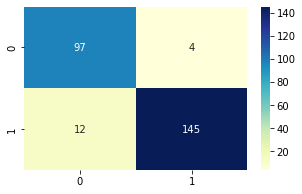

In [36]:
print(classification_report(testY,y_pred))
con = confusion_matrix(y_pred, testY)
plt.figure(figsize=(5,3))
sns.heatmap(con, annot=True,cmap="YlGnBu",fmt='g')

Chọn F1-score là metric chính cho bài toán vì việc so sánh giữa người khỏe mạnh bị dự đoán là bị bệnh tim và bị bệnh tim được dự đoán là khỏe mạnh thì hai kết quả đều quan trọng như nhau nên ta không thể ưu tiên chọn 1 trong 2. Vậy nên F1-score là sự lựa chọn tốt cho bài toán này. 

Chọn penalty='l2' và solver='liblinear' vì dữ liệu không quá lớn và không có quá nhiều biến đầu vào phức tạp.